In [1]:
!ls

bidirectional_blast.ipynb  blastp_sly_vs_spenn.out  blastp_spenn_vs_sly.out


In [1]:
import networkx as nx
from Bio import SearchIO

In [2]:
G = nx.DiGraph()
H = nx.DiGraph()
I = nx.DiGraph()

In [3]:
blastp_results = "blastp_sly_vs_spenn.out"

In [4]:
flag = False
gene_sly = ""
gene_spenn = ""
with open(blastp_results,"r") as f:
    for line in f:
        if line.startswith("Query="):
            gene_sly = line.split("Query= ")[-1].split(".")[0]
            flag = True
        if flag == True and line.startswith("Sopen"):
            line2 = line[:-1].split(" ")
            i = len(line2)-1
            j = 0
            eval = 1
            score = 0
            while j < 2:
                if line2[i] != "":
                    if j == 0:
                        eval = line2[i]
                    else:
                        score = line2[i]
                    j += 1
                i -= 1
               
            gene_spenn = line[:-1].split(".")[0]
            flag = False
            G.add_edge(gene_sly, gene_spenn, score=score, eval=eval)
            H.add_edge(gene_sly, gene_spenn, score=score, eval=eval)

In [5]:
blastp_results = "blastp_spenn_vs_sly.out"
flag = False
gene_sly = ""
gene_spenn = ""
with open(blastp_results,"r") as f:
    for line in f:
        if line.startswith("Query="):
            gene_sly = line.split("Query= ")[-1].split(".")[0]
            flag = True
        if flag == True and line.startswith("Sol"):
            line2 = line[:-1].split(" ")
            i = len(line2)-1
            j = 0
            eval = 1
            score = 0
            while j < 2:
                if line2[i] != "":
                    if j == 0:
                        eval = line2[i]
                    else:
                        score = line2[i]
                    j += 1
                i -= 1
            
            gene_spenn = line[:-1].split(".")[0]
            flag = False
            if gene_sly not in I.nodes:
                G.add_edge(gene_sly, gene_spenn, score=score, eval=eval)
                I.add_edge(gene_sly, gene_spenn, score=score, eval=eval)

In [6]:
count = 1
with open("orthologs_blast.tsv","w") as f:
    for node_A in G.nodes:
        if node_A.startswith("Solyc"):
            for node_B in G.nodes:
                if node_B.startswith("Sopen"):
                    if G.has_edge(node_A,node_B) and G.has_edge(node_B, node_A):
                        f.write("ortholog_"+str(count)+"\t"+node_A+"\t"+node_B+"\n")
                        count += 1
print(count)

21105


In [7]:
print(len(H.edges))
print(len(I.edges))

30637
39637


In [8]:
import pandas as pd

In [9]:
data = {}
for edge in H.edges(data=True):
    data[edge[0]] = {"S. pennellii":edge[1],"Score":edge[2]["score"],"E-value":edge[2]["eval"]}
df1 = pd.DataFrame(data).T
df1.index.name = 'S. lycopersicum'
df1

,S. pennellii,Score,E-value
S. lycopersicum,,,
Solyc12g009745,Sopen12g004670,1382,0.0
Solyc10g008210,Sopen10g004070,1675,0.0
Solyc06g072480,Sopen06g028850,173,8e-57
Solyc09g057715,Sopen07g016700,286,3e-98
Solyc05g015710,Sopen05g011160,244,2e-84
...,...,...,...
Solyc00g006850,Sopen06g022850,117,2e-30
Solyc00g024570,Sopen04g023230,387,2e-133
Solyc00g015737,Sopen00g009160,184,3e-57


In [10]:
data = {}
a = 0
for edge in I.edges(data=True):
    data[edge[0]] = {"S. lycopersicum":edge[1],"Score":edge[2]["score"],"E-value":edge[2]["eval"]}
    a += 1
print(a)
df2 = pd.DataFrame(data).T
df2.index.name = 'S. pennellii'
df2

39637


,S. lycopersicum,Score,E-value
S. pennellii,,,
Sopen00g001010,Solyc10g076170,89.7,3e-24
Sopen00g001030,Solyc00g019730,290,5e-101
Sopen00g001040,Solyc11g039980,381,1e-134
Sopen00g001050,Solyc06g042990,94.0,2e-24
Sopen00g001080,Solyc00g313030,104,9e-32
...,...,...,...
Sopen12g034990,Solyc08g067745,490,3e-160
Sopen12g035000,Solyc05g016615,163,4e-42
Sopen12g035010,Solyc12g100340,223,3e-75


In [11]:
with pd.ExcelWriter('Supp. Table 1.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='S. lycopersicum orthologs')
    df2.to_excel(writer, sheet_name='S. pennellii orthologs')

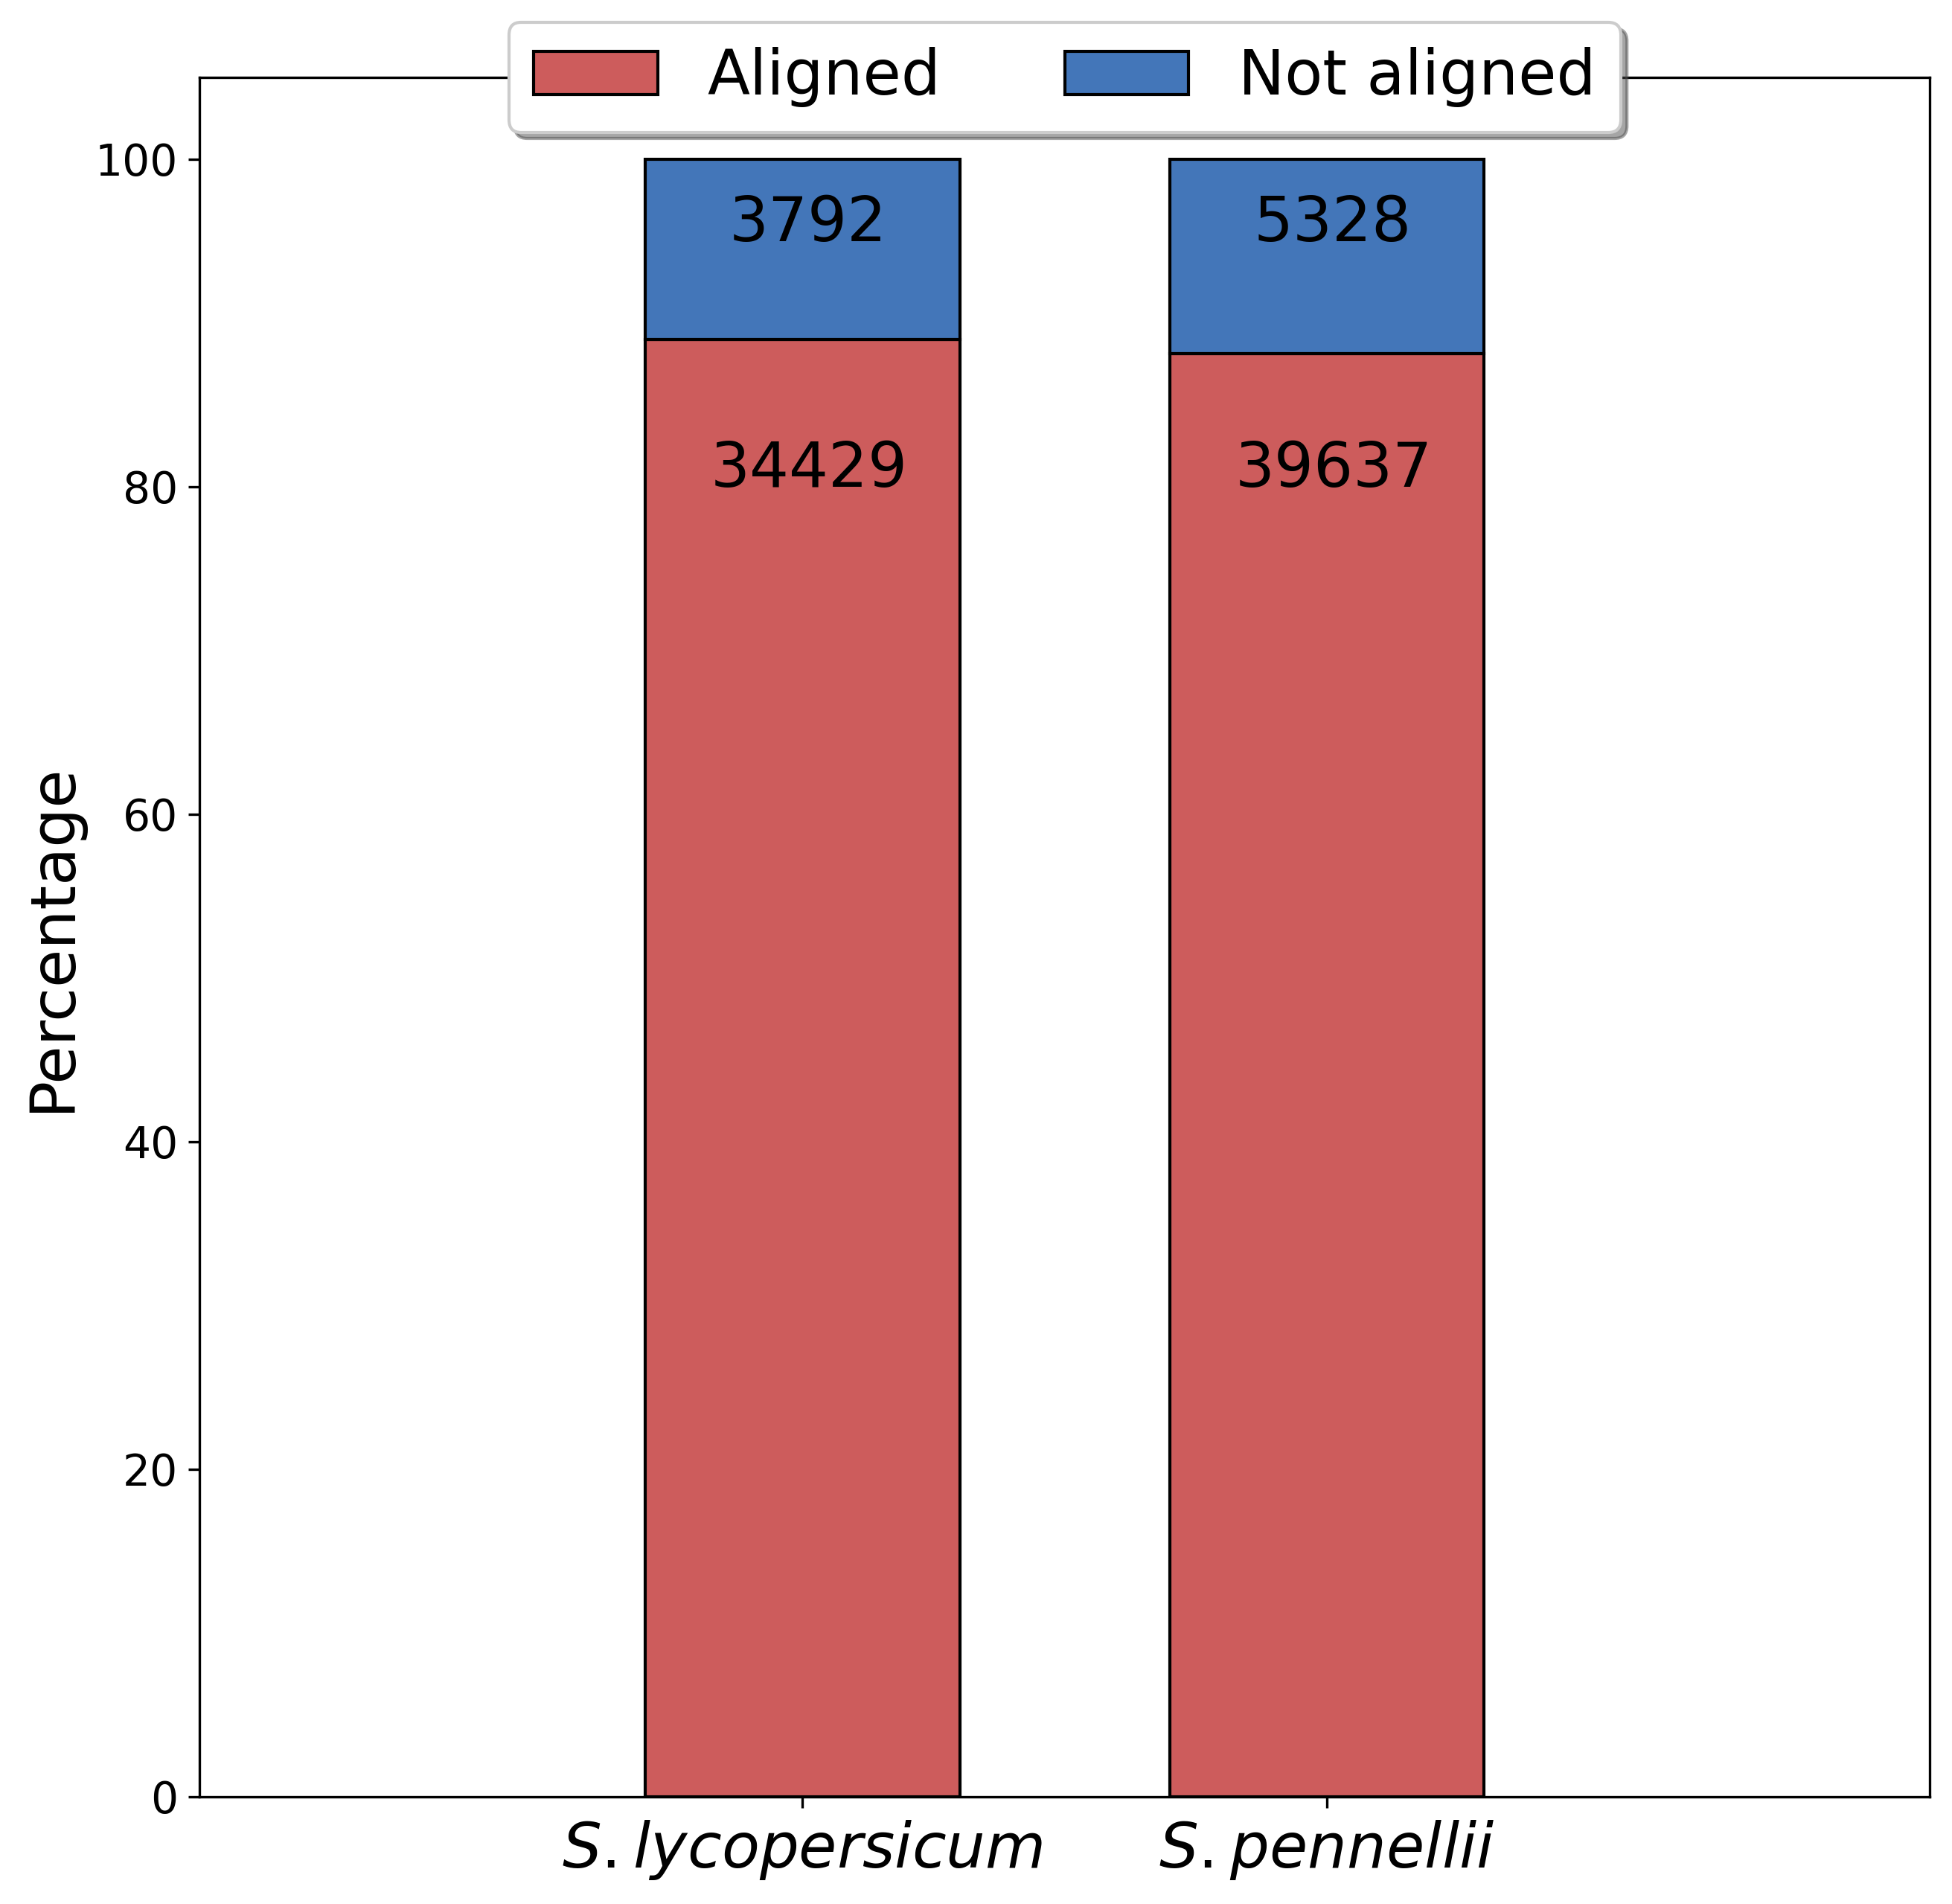

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10), dpi=300)
plt.plot(0,0)
plt.plot(3,0)
plt.bar([1,2],[(30637/34429)*100, (39637/44965)*100], edgecolor="k", color="#CD5C5C", label="Aligned", width=0.6)
plt.bar([1,2],[((34429-30637)/34429)*100, ((44965-39637)/44965)*100],color="#4376B9", bottom = [(30637/34429)*100, (39637/44965)*100], edgecolor="k", label="Not aligned", width=0.6)
plt.xticks([1,2],["$\it{S. lycopersicum}$", "$\it{S. pennellii}$"],fontsize=20)
plt.yticks(fontsize=14)

plt.annotate("34429",(0.825,80), fontsize=20)
plt.annotate(str(34429-30637),(0.86,95), fontsize=20)

plt.annotate("39637",(1.825,80), fontsize=20)
plt.annotate(str(44965-39637),(1.86,95), fontsize=20)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True, fontsize=20)
plt.ylabel("Percentage", fontsize=20)
#plt.bar(2,(30637/34429)*100, edgecolor="k")
#plt.bar(2,((34429-30637)/34429)*100, bottom = (30637/34429)*100, edgecolor="k")
plt.savefig("aligned_not_aligned.pdf")

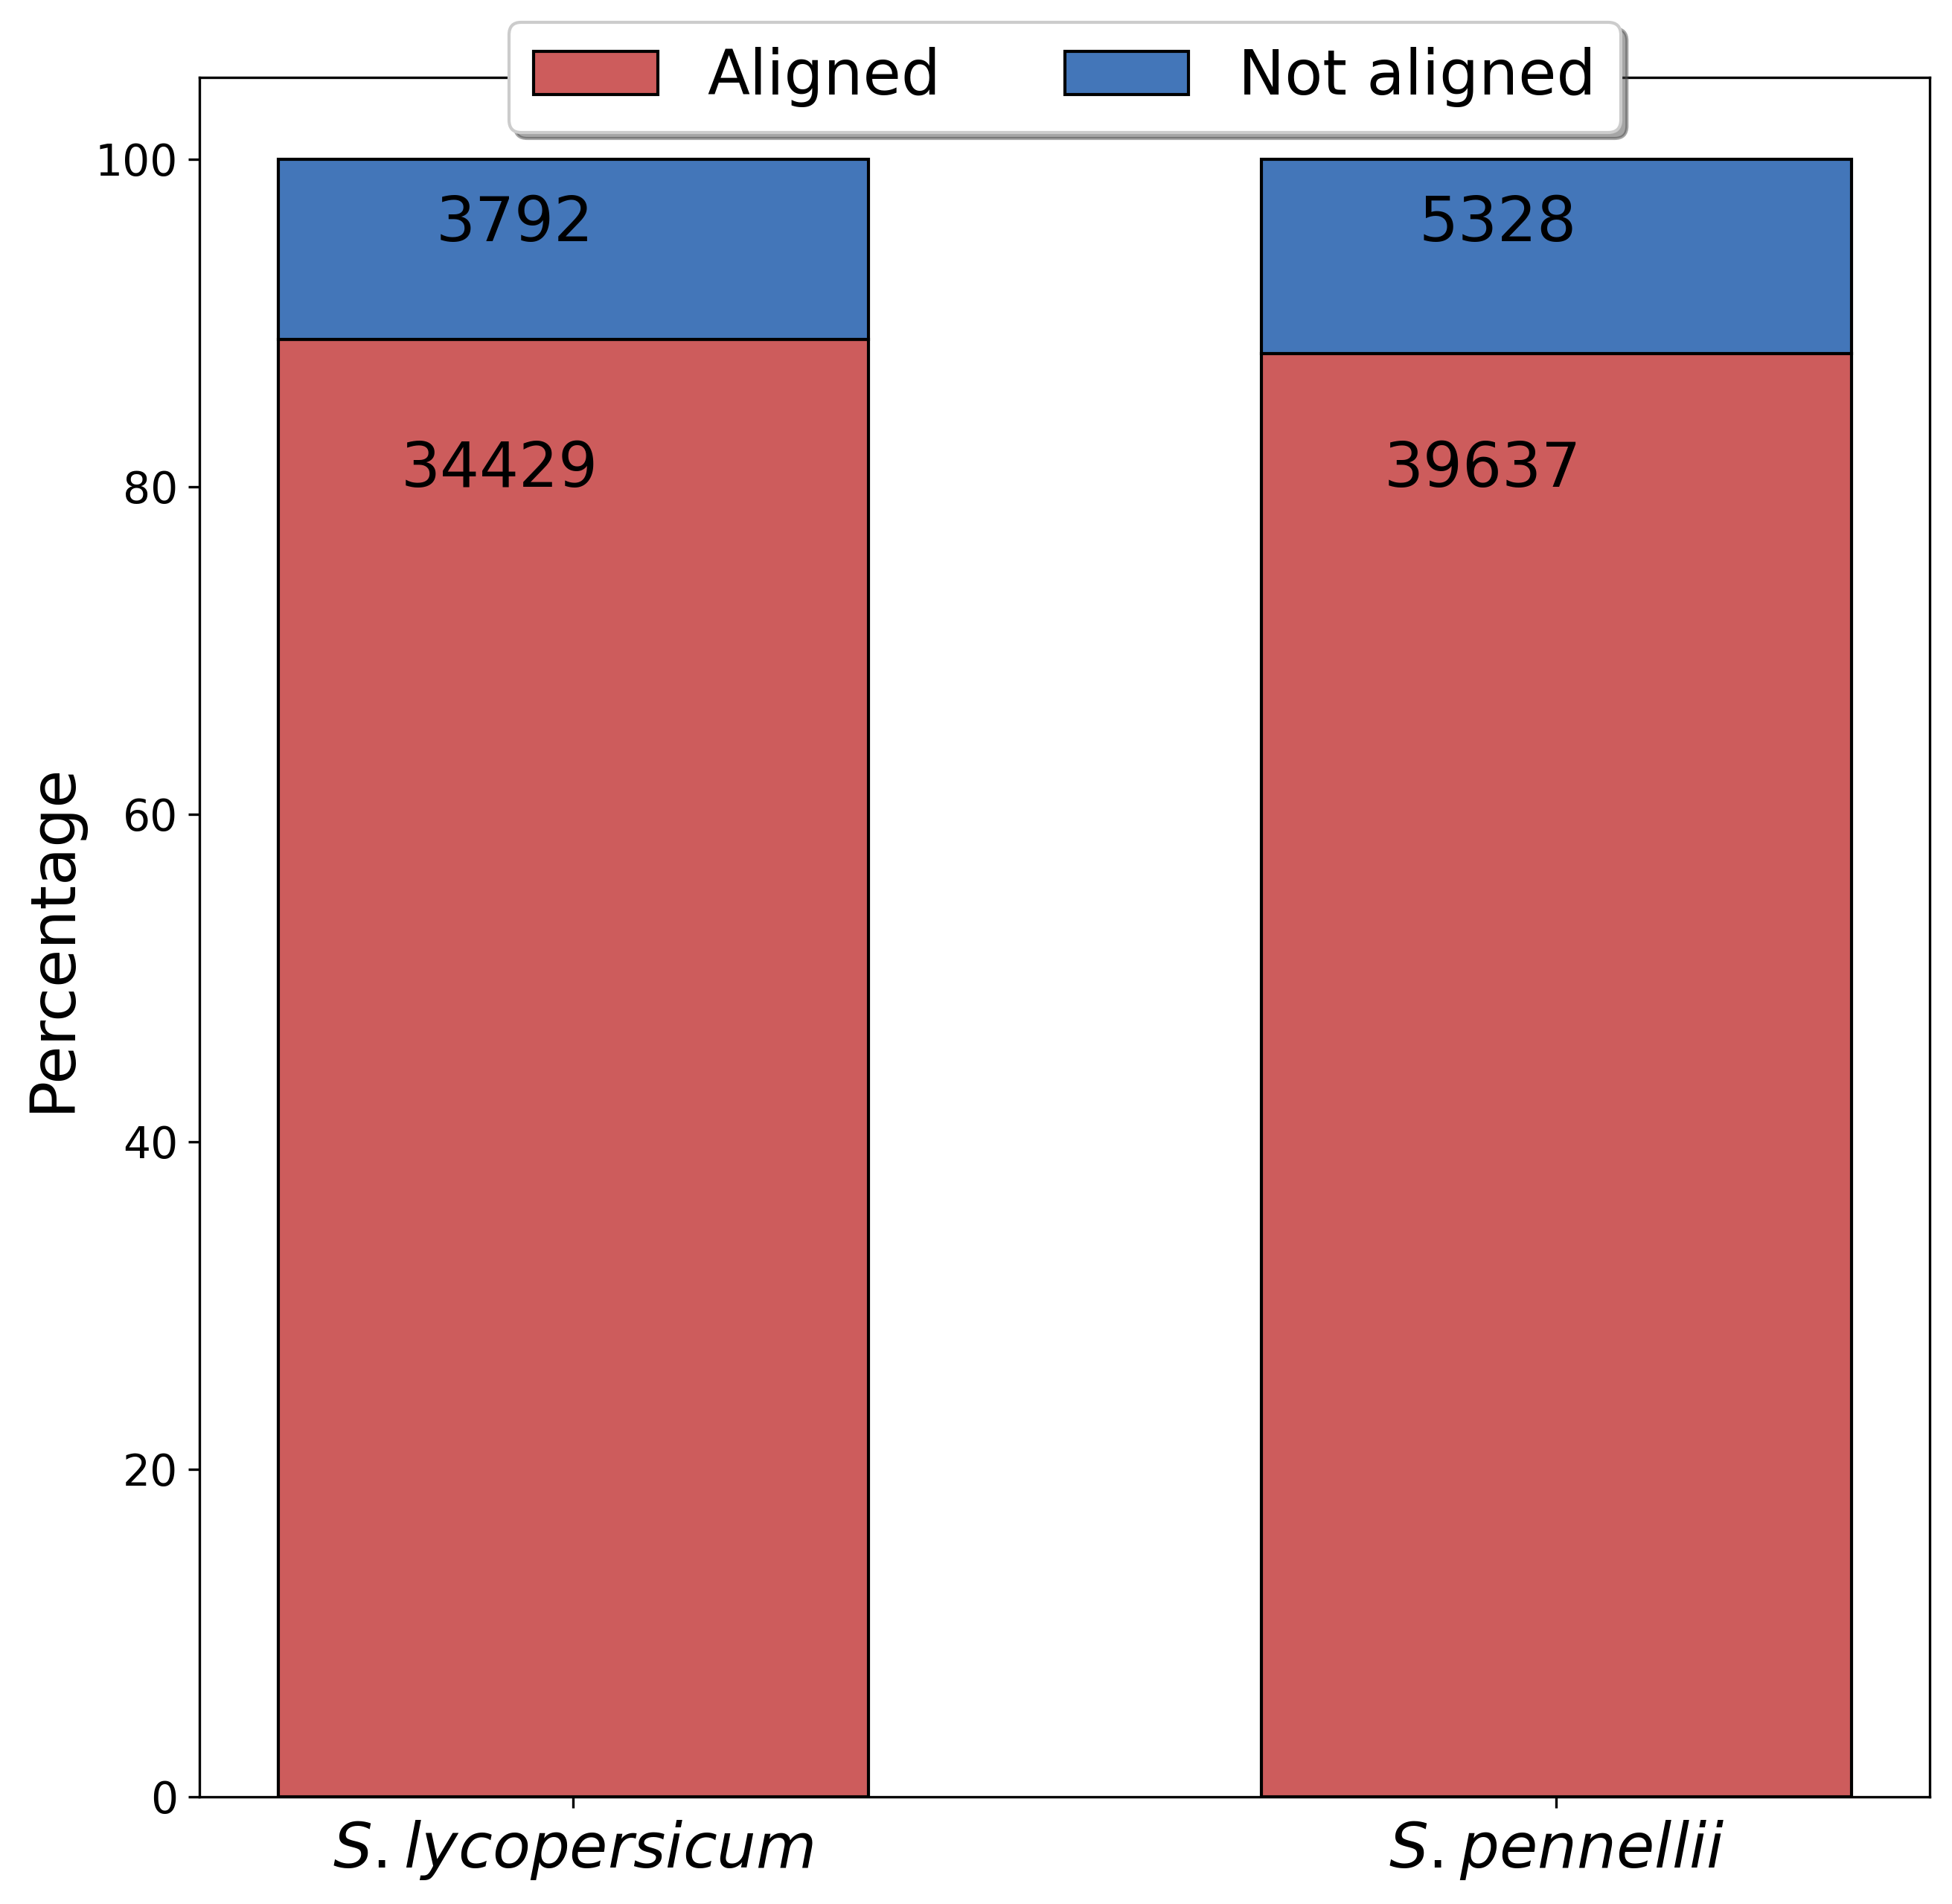

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10), dpi=300)
plt.plot(3,0)
plt.bar([1,2],[(30637/34429)*100, (39637/44965)*100], edgecolor="k", color="#CD5C5C", label="Aligned", width=0.6)
plt.bar([1,2],[((34429-30637)/34429)*100, ((44965-39637)/44965)*100],color="#4376B9", bottom = [(30637/34429)*100, (39637/44965)*100], edgecolor="k", label="Not aligned", width=0.6)
plt.xticks([1,2],["$\it{S. lycopersicum}$", "$\it{S. pennellii}$"],fontsize=20)
plt.yticks(fontsize=14)

plt.annotate("34429",(0.825,80), fontsize=20)
plt.annotate(str(34429-30637),(0.86,95), fontsize=20)

plt.annotate("39637",(1.825,80), fontsize=20)
plt.annotate(str(44965-39637),(1.86,95), fontsize=20)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True, fontsize=20)
plt.ylabel("Percentage", fontsize=20)
#plt.bar(2,(30637/34429)*100, edgecolor="k")
#plt.bar(2,((34429-30637)/34429)*100, bottom = (30637/34429)*100, edgecolor="k")
plt.savefig("aligned_not_aligned.pdf")

In [37]:
a = 0
for node in I.nodes:
    if I.out_degree(node) > 1:
       
        a += 1
print(a)

452


In [44]:
df3 = pd.read_csv("orthologs_blast.tsv",sep="\t", header=None)
df3


,0,1,2
0,ortholog_1,Solyc10g008210,Sopen10g004070
1,ortholog_2,Solyc06g072480,Sopen06g028850
2,ortholog_3,Solyc05g015710,Sopen05g011160
3,ortholog_4,Solyc01g067380,Sopen01g029270
4,ortholog_5,Solyc07g006800,Sopen07g002900
...,...,...,...
21205,ortholog_21206,Solyc00g255510,Sopen02g012890
21206,ortholog_21207,Solyc00g009080,Sopen04g028100
21207,ortholog_21208,Solyc00g048510,Sopen02g018160
21208,ortholog_21209,Solyc00g049520,Sopen04g005900


In [74]:
a = 0
for i, sol in enumerate(df3[1]):
    sopen = df3[2][i]
    if I.has_edge(sopen, sol) == False:
        a += 1
print(a)
#    print ()# != df3[2][i]:
    #print(df3[1][i])


106


In [52]:
df2[df2["S. lycopersicum"]=="Solyc05g015710"]

,S. lycopersicum,Score,E-value
S. pennellii,,,
Sopen04g016940,Solyc05g015710,153,9e-49
Sopen05g011160,Solyc05g015710,244,8e-85


In [56]:
df2.loc["Sopen10g004070"]

S. lycopersicum    Solyc10g008210
Score                        1670
E-value                       0.0
Name: Sopen10g004070, dtype: object